# Hossein Baghdadi
# DecisionTree Project with scikit-learn

# Tools

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

# Load Dataset

In [2]:
data = pd.read_csv('train+dev+test.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
data.shape

(8124, 23)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
data['veil-type'].unique()

array(['p'], dtype=object)

In [6]:
data.drop(['veil-type'], axis=1, inplace=True)

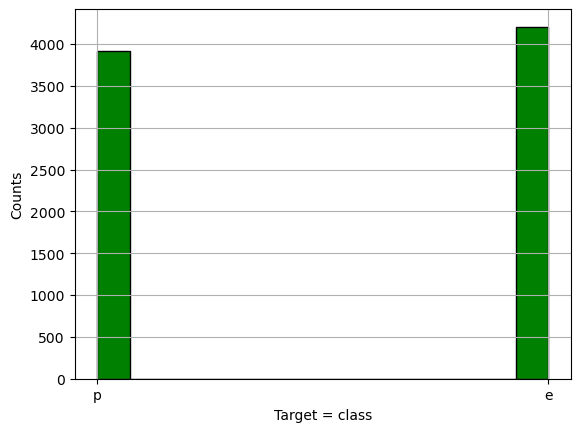

In [7]:
plt.hist(data['class'], bins='auto', edgecolor='black', color='green')
plt.xlabel('Target = class')
plt.ylabel('Counts')
plt.grid()
plt.show();

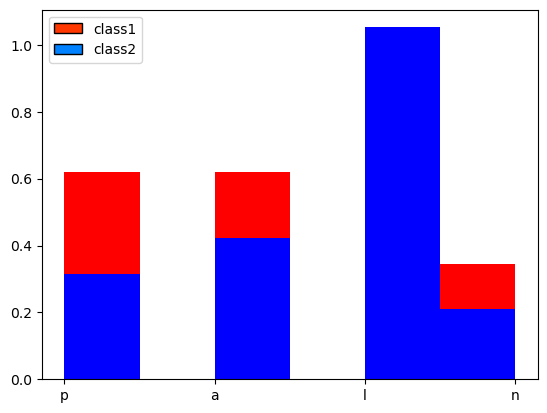

In [8]:
plt.hist(data[0:29].odor, bins='auto', color='red', density='True')
plt.hist(data[30:49].odor, bins='auto', color='blue', density='True')
cc = plt.get_cmap('jet')
h = [Rectangle((0, 0),1,1,color=c,ec='k') for c in [cc(0.85), cc(0.25)]]

plt.legend(h, ['class1', 'class2']);

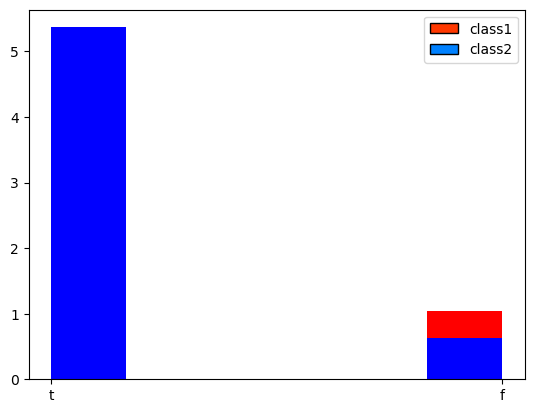

In [9]:
plt.hist(data[0:29].bruises, bins='auto', color='red', density='True')
plt.hist(data[30:49].bruises, bins='auto', color='blue', density='True')
cc = plt.get_cmap('jet')
h = [Rectangle((0, 0),1,1,color=c,ec='k') for c in [cc(0.85), cc(0.25)]]

plt.legend(h, ['class1', 'class2']);

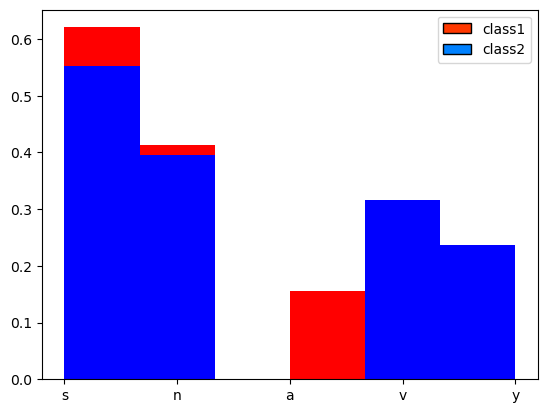

In [10]:
plt.hist(data[0:29].population, bins='auto', color='red', density='True')
plt.hist(data[30:49].population, bins='auto', color='blue', density='True')
cc = plt.get_cmap('jet')
h = [Rectangle((0, 0),1,1,color=c,ec='k') for c in [cc(0.85), cc(0.25)]]

plt.legend(h, ['class1', 'class2']);

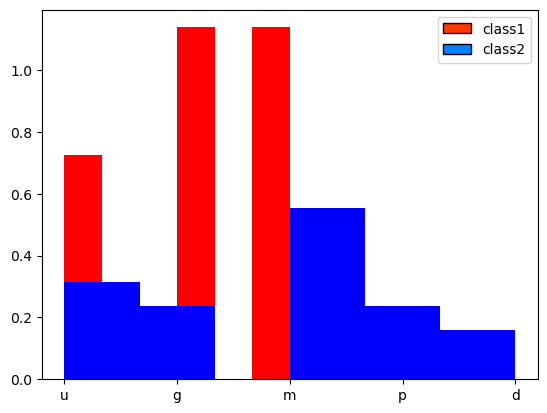

In [11]:
plt.hist(data[0:29].habitat, bins='auto', color='red', density='True')
plt.hist(data[30:49].habitat, bins='auto', color='blue', density='True')
cc = plt.get_cmap('jet')
h = [Rectangle((0, 0),1,1,color=c,ec='k') for c in [cc(0.85), cc(0.25)]]

plt.legend(h, ['class1', 'class2']);

# Missing Values

In [12]:
# data.isnull().sum()

In [13]:
data['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [14]:
data['stalk-root'].tail()

8119    ?
8120    ?
8121    ?
8122    ?
8123    ?
Name: stalk-root, dtype: object

In [15]:
data['stalk-root'] = data['stalk-root'].replace(['?'], data['stalk-root'].mode())

In [16]:
data['stalk-root'].tail()

8119    b
8120    b
8121    b
8122    b
8123    b
Name: stalk-root, dtype: object

In [17]:
data['stalk-root'].value_counts()

b    6256
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

# OrdinalEncoder & LabelEncoder for our categorical dataset

In [18]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [19]:
oe = preprocessing.OrdinalEncoder(dtype='int')
oe_fitted = oe.fit(data[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']])

In [20]:
oe_fitted

OrdinalEncoder(dtype='int')

In [21]:
data[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']] = oe_fitted.transform(data[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']])

In [22]:
le = preprocessing.LabelEncoder()
le_fitted = le.fit(data['class'])

In [23]:
le_fitted

LabelEncoder()

In [24]:
data['class'] = le_fitted.transform(data['class'])

In [25]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

# Heatmap

data.corr() is used to find the pairwise correlation of all columns in the Pandas Dataframe in Python. Any NaN values are automatically excluded. Any non-numeric data type or columns in the Dataframe, it is ignored. 👇👇

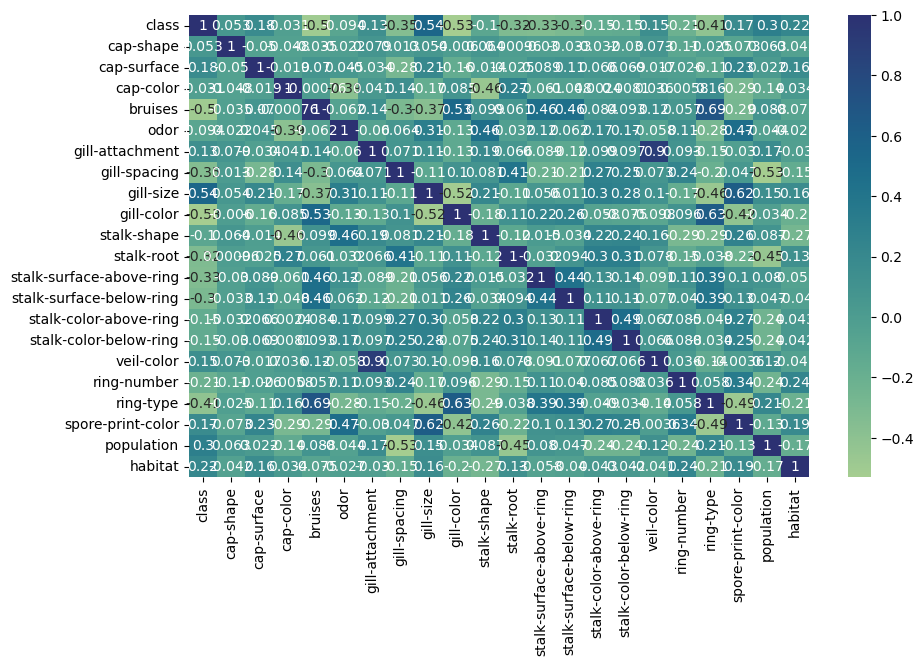

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='crest');

# Feature Set

In [28]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [29]:
X = data[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']].values
X[0:5]

array([[5, 2, 4, 1, 6, 1, 0, 1, 4, 0, 2, 2, 2, 7, 7, 2, 1, 4, 2, 3, 5],
       [5, 2, 9, 1, 0, 1, 0, 0, 4, 0, 1, 2, 2, 7, 7, 2, 1, 4, 3, 2, 1],
       [0, 2, 8, 1, 3, 1, 0, 0, 5, 0, 1, 2, 2, 7, 7, 2, 1, 4, 3, 2, 3],
       [5, 3, 8, 1, 6, 1, 0, 1, 5, 0, 2, 2, 2, 7, 7, 2, 1, 4, 2, 3, 5],
       [5, 2, 3, 0, 5, 1, 1, 0, 4, 1, 2, 2, 2, 7, 7, 2, 1, 0, 3, 0, 1]])

In [30]:
y = data['class'].values
y[0:5]

array([1, 0, 0, 1, 0])

# Train & Test Set

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=4)
print("Size of Train set:", X_train.shape, y_train.shape)
print("Size of Test set:", X_test.shape, y_test.shape)

Size of Train set: (6499, 21) (6499,)
Size of Test set: (1625, 21) (1625,)


The Gini index has a maximum impurity is 0.5 and maximum purity is 0, whereas Entropy has a maximum impurity of 1 and maximum purity is 0.👇👇

# DecisionTree Classifier

In [32]:
model = DecisionTreeClassifier(criterion='gini', max_depth=4)
model = model.fit(X_train, y_train)
model

DecisionTreeClassifier(max_depth=4)

In [33]:
ypred = model.predict(X_test)
print(ypred[0:5])
print(y_test[0:5])

[0 1 1 0 1]
[0 1 1 0 1]


# Accuracy

In [34]:
print('Train set Accuracy :', accuracy_score(y_train, model.predict(X_train)) * 100)
acc = print('Test set Accuracy :', accuracy_score(y_test, ypred) * 100)

Train set Accuracy : 97.73811355593168
Test set Accuracy : 97.96923076923076


# Classification Report

In [35]:
rp = classification_report(y_test, ypred)
print(rp)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       845
           1       0.97      0.99      0.98       780

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



# Roc Curve & Auc Score

In [36]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, ypred)

In [37]:
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, ypred))

roc_auc_score for DecisionTree:  0.9800295857988167


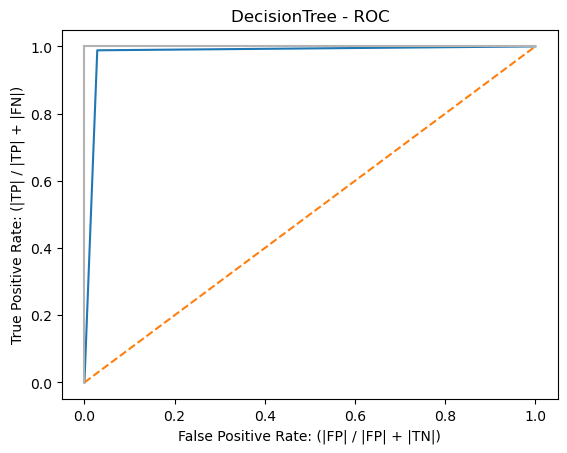

In [38]:
plt.title('DecisionTree - ROC')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7")
plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate: (|TP| / |TP| + |FN|)')
plt.xlabel('False Positive Rate: (|FP| / |FP| + |TN|)')
plt.show()

# Final Visualization for our Tree

In [39]:
w = data.drop(['class'], axis=1)

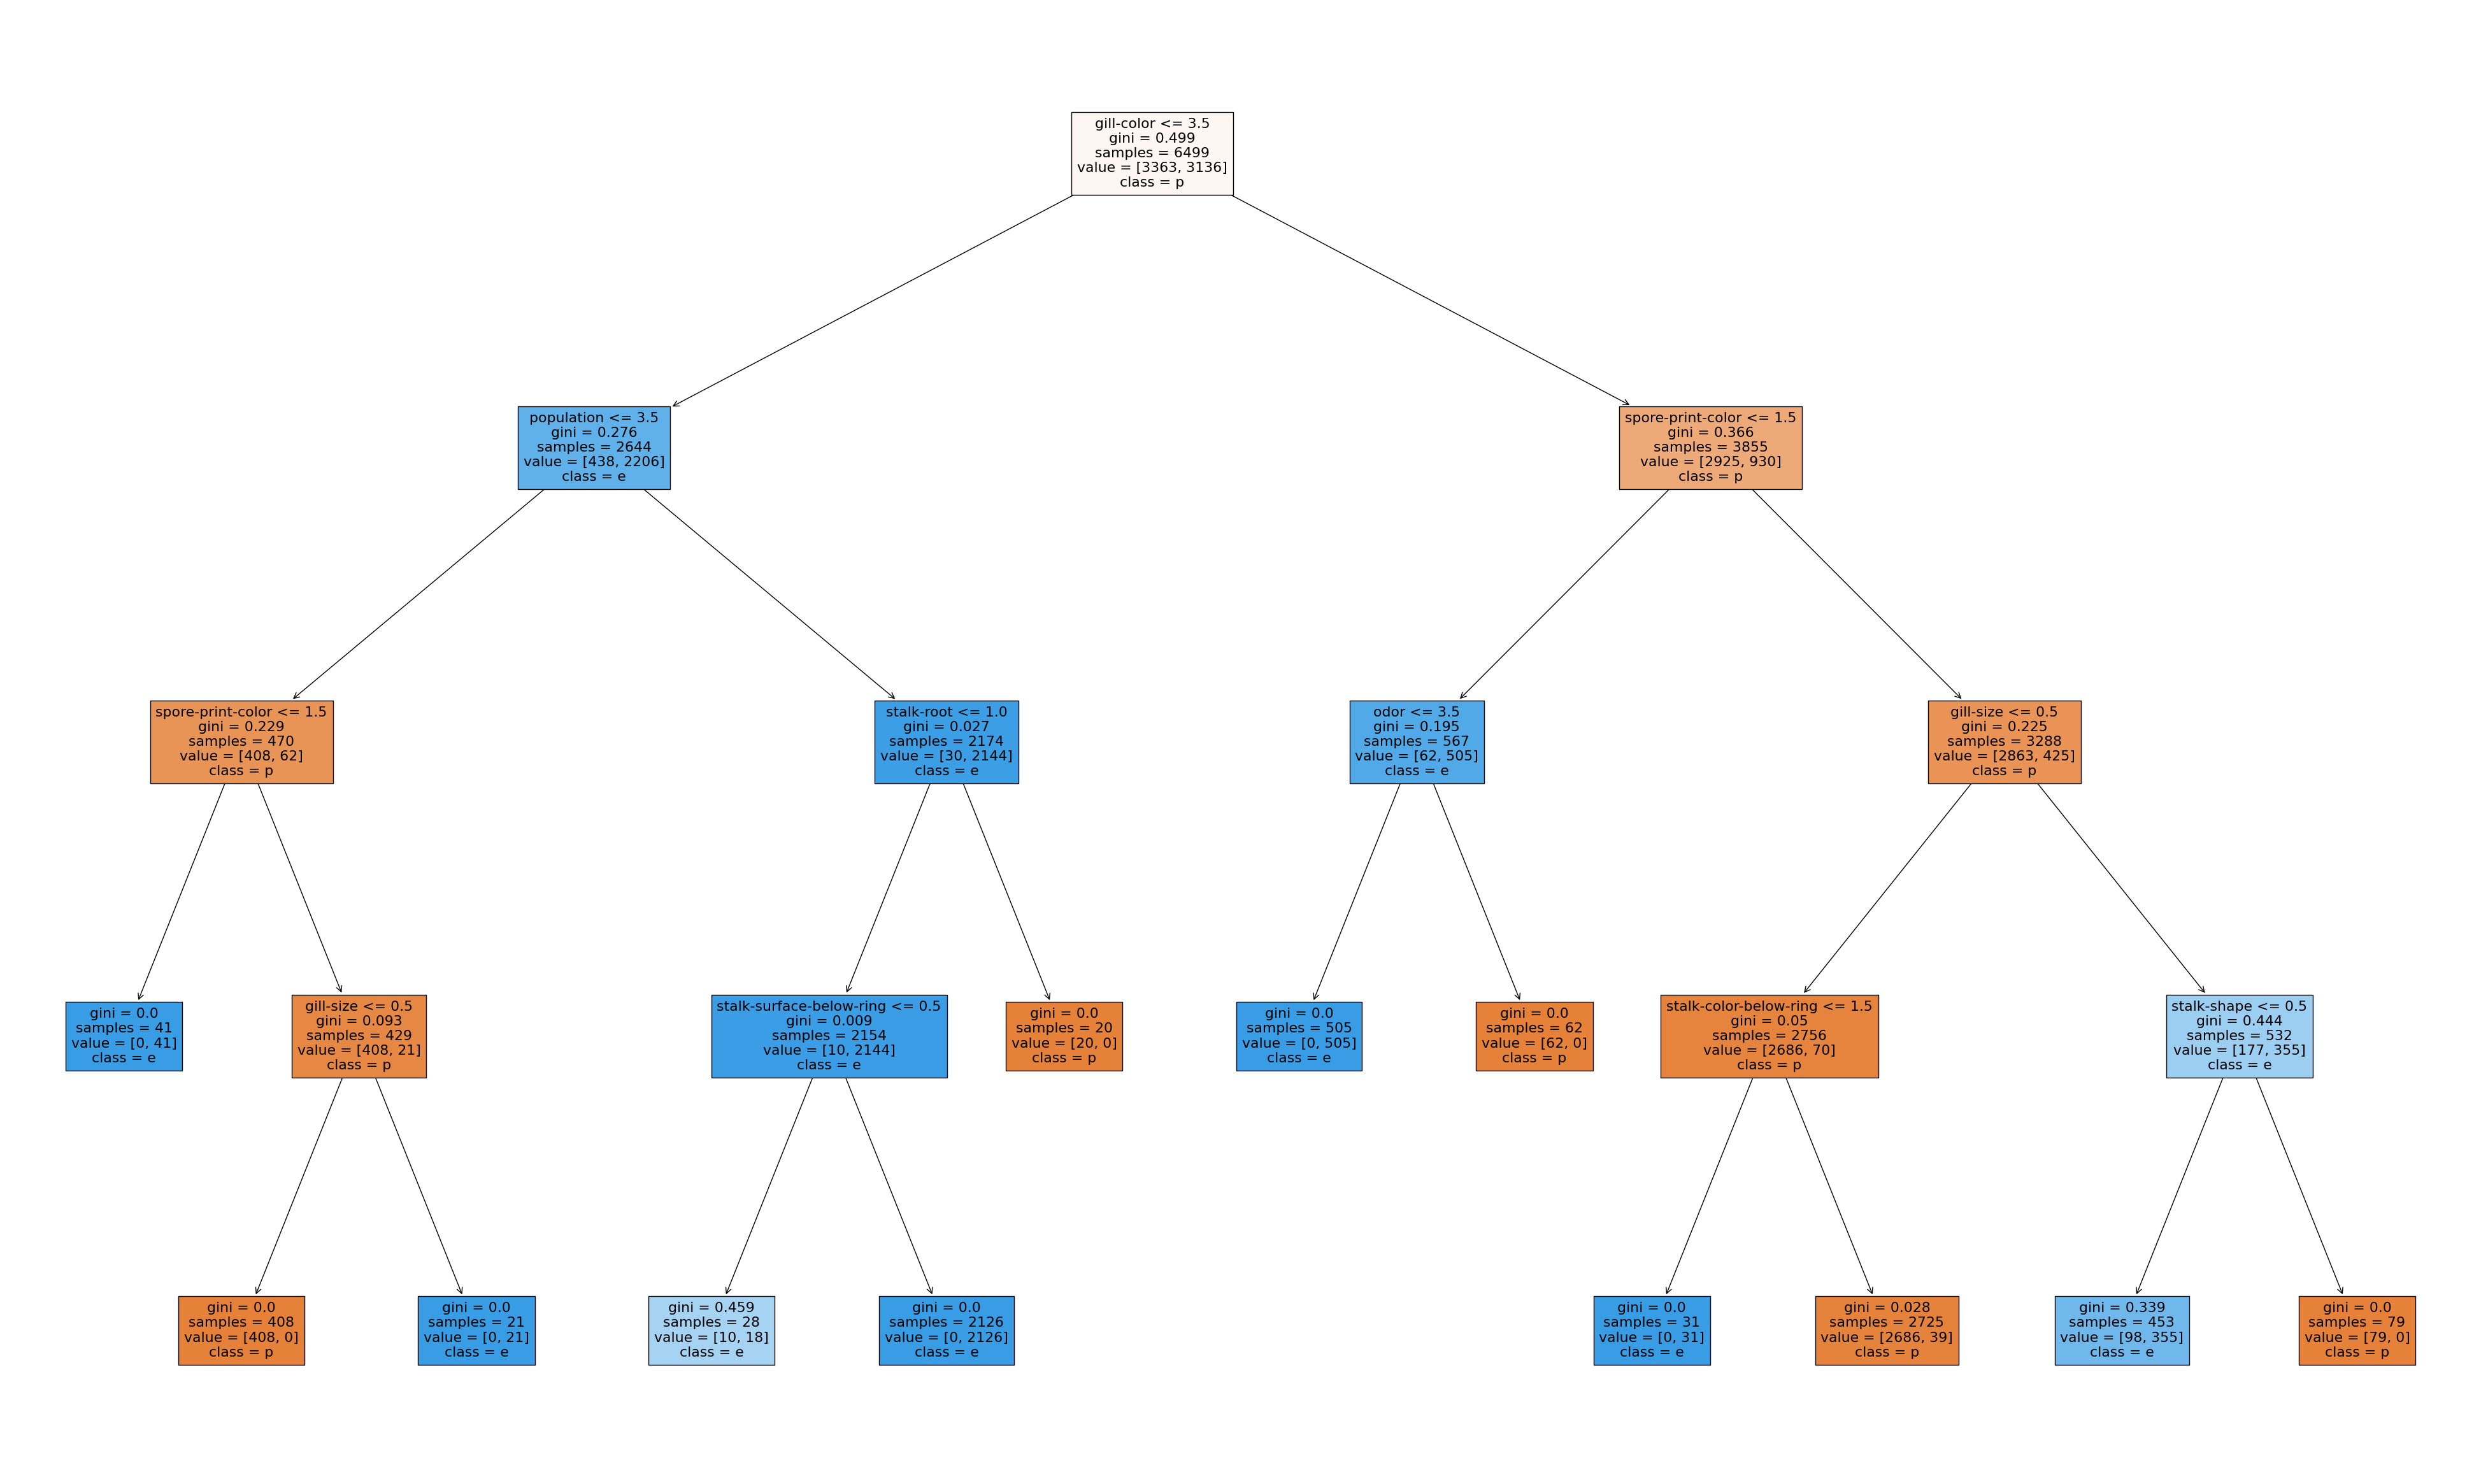

In [40]:
fig = plt.figure(figsize=(50, 30))
plot_tree(model, feature_names=w.columns, class_names=['p', 'e'], filled=True)
fig.savefig('visualization of DecisionTree.png')